# Number of reviewers vs. raters
In IMDb, everyone can give a review of a movie, this is explained in "popular review". I want to see if there is a correlation between number of reviewers and number of raters.

### Objective
* **Goal:** Create a correlation plot of reviewers vs. raters
* **Hypothesis:** Movies with a higher number of reviews is strongly correlated with number of raters

*Description of set up is written in Popular review* 

First i set up the data, making it easy and understandable to create the visualization

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create DataFrame to access items in dataset
data_path = "../data/merged_dataset.csv"

df = pd.read_csv(data_path)

# Convert number of raters and number of reviewes to numeric, in case of issues
df["num_raters"] = pd.to_numeric(df["num_raters"], errors="coerce")
df["num_reviews"] = pd.to_numeric(df["num_reviews"], errors="coerce")

# Drop rows with missing values in the columns
df = df.dropna(subset=["num_raters", "num_reviews"])

#### First try
Default settings from seaborn

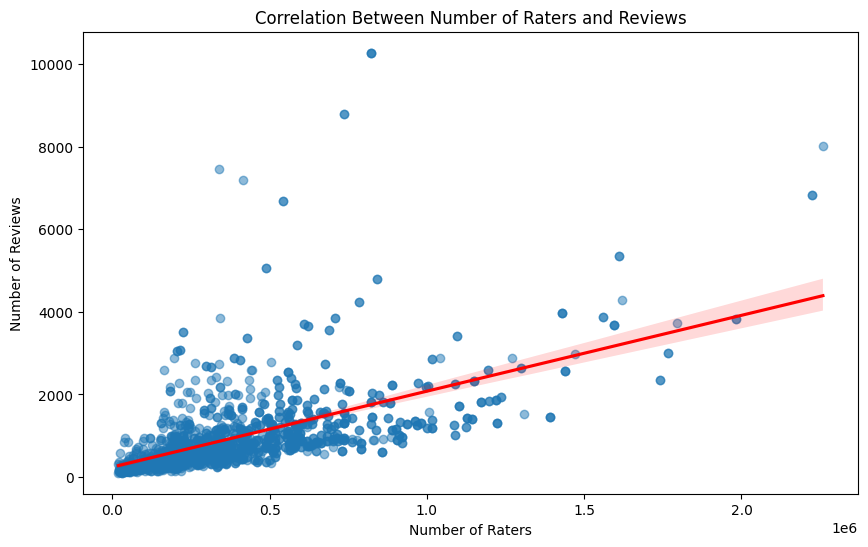

In [3]:
# Create a scatter plot with a regression line
plt.figure(figsize=(10, 6)) 
sns.regplot(x=df["num_raters"], y=df["num_reviews"], scatter_kws={"alpha": 0.5}, line_kws={"color": "red"}) #uses seaborn to create a scatter plot with a regression line

# Labels and title
plt.xlabel("Number of Raters")
plt.ylabel("Number of Reviews")
plt.title("Correlation Between Number of Raters and Reviews")

# Show the plot
plt.show()

#### Second try
Making  it more visually appealing

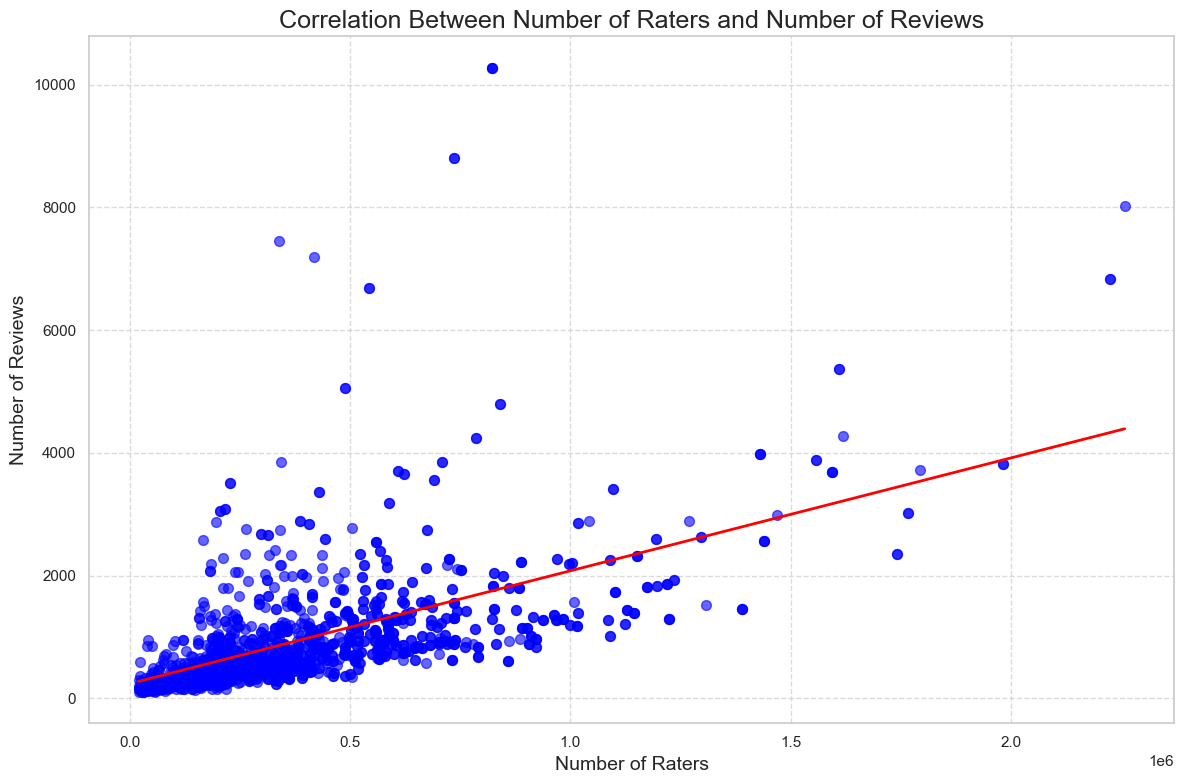

In [4]:
# Set the Seaborn style
sns.set(style="whitegrid", palette="muted")

# Create a more refined scatter plot with a regression line
plt.figure(figsize=(12, 8))
sns.regplot(x="num_raters", y="num_reviews", data=df,
            scatter_kws={"s": 50, "alpha": 0.6, "color": "blue"},  # Adjusted scatter size and transparency
            line_kws={"color": "red", "linewidth": 2},  # Red regression line with thicker width
            ci=None)  # Disable confidence interval for a cleaner plot

# Customize the plot appearance
plt.title("Correlation Between Number of Raters and Number of Reviews", fontsize=18)
plt.xlabel("Number of Raters", fontsize=14)
plt.ylabel("Number of Reviews", fontsize=14)

# Add gridlines for better context
plt.grid(True, linestyle="--", alpha=0.7)

# Show the plot
plt.tight_layout()  # Ensures everything fits within the window
plt.show()

#### Last try
Making it more visual appealing and understandable. Changing the colors to fit with the rest of the figures, and change the axis so it's easier to read.

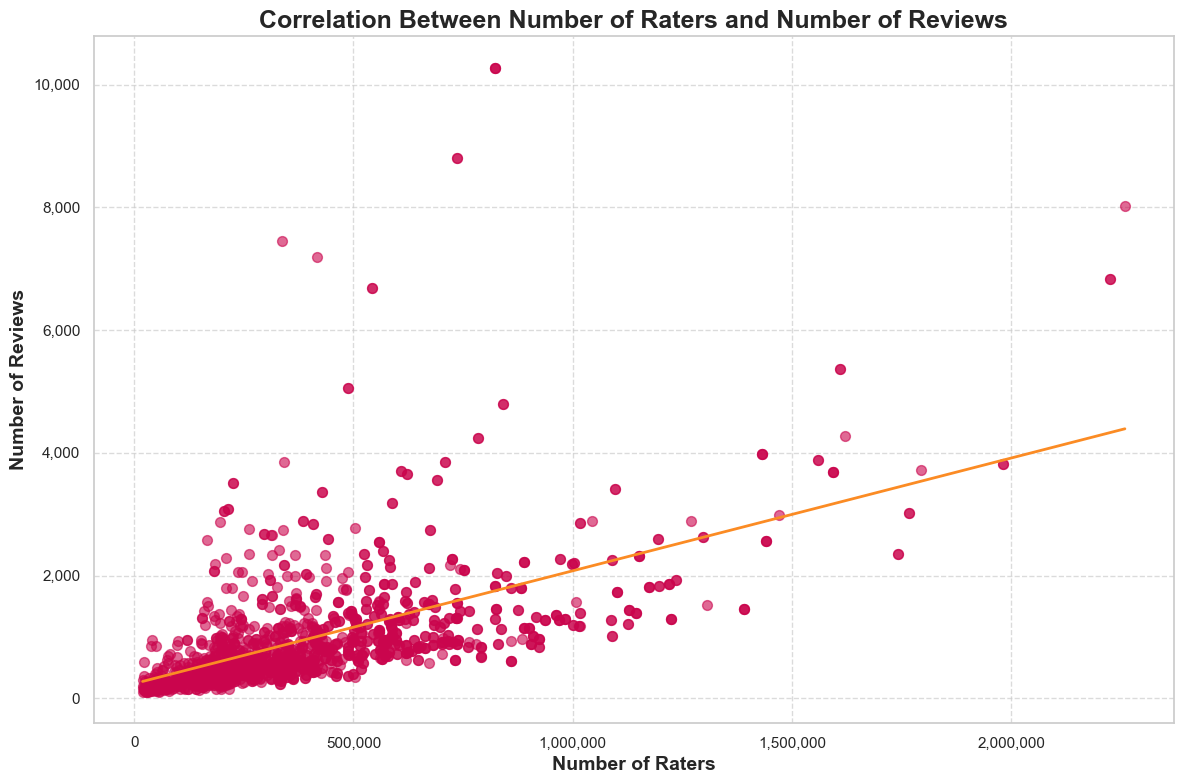

In [23]:

# Set the Seaborn style
sns.set(style="whitegrid", palette="muted")

# Create a more refined scatter plot with a regression line
plt.figure(figsize=(12, 8))
sns.regplot(x="num_raters", y="num_reviews", data=df,
            scatter_kws={"s": 50, "alpha": 0.6, "color": "#CA054D"},  # Adjusted scatter size and transparency
            line_kws={"color": "#FB8B24", "linewidth": 2},  # Red regression line with thicker width
            ci=None)  # Disable confidence interval for a cleaner plot

# Define the formatter function to add commas
formatter = FuncFormatter(lambda x, pos: f'{x:,.0f}')

# Apply the formatter to the axes
plt.gca().xaxis.set_major_formatter(formatter) #The formatter is designed to format the numbers with commas (e.g., 1,000,000 instead of 1e6).
plt.gca().yaxis.set_major_formatter(formatter)

# Customize the plot appearance
plt.title("Correlation Between Number of Raters and Number of Reviews", fontsize=18, fontweight="bold")
plt.xlabel("Number of Raters", fontsize=14, fontweight="bold")
plt.ylabel("Number of Reviews", fontsize=14, fontweight="bold")

# Add gridlines for better context
plt.grid(True, linestyle="--", alpha=0.7)

# Saving the plot to the Plots folder
plt.savefig('../plots/Review_vs_Raters.jpg')

# Show the plot
plt.tight_layout()  # Ensures everything fits within the window
plt.show()

### Conclusion
I does not seem like a strong correlation, more of a fan-plot